In [1]:
# System
import pandas as pd
import numpy as np
import pickle as pk
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import zlib
import time
import math
import random
import statistics
from collections import Counter



In [2]:
## Plotting parameters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


## Choosing colorblind scheme
import matplotlib.style as style 
#style.use('seaborn-colorblind') 
style.use('tableau-colorblind10') 

# Plotting configuration


plt.rcParams['figure.figsize'] = [20, 12]

SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 24
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# Read the frame txt file 320 lines at a time

from itertools import islice

count_daphne_frames = 1
list_of_frames = []
with open("ssp_frames.txt") as myfile:
    for line in myfile: 
        list_of_frames.append(int(line))
print("Number of channels in a a frame: ", len(list_of_frames))    
        

Number of channels in a a frame:  482


In [10]:
# Read the frame txt file 320 lines at a time

from itertools import islice

count_daphne_frames = 1
list_of_frames = []
with open("ssp_frames_total.txt") as myfile:
    num_lines = sum(1 for _ in myfile)
    num_ssb_frames = int(num_lines/482)
    print("Total number of frames in a fragment: ", num_ssb_frames)

with open("ssp_frames_total.txt") as myfile:    
    for x in range(num_ssb_frames):
        start_val = 0
        end_val = 482*count_daphne_frames
        head = list(islice(myfile, 0, 482))
        count_daphne_frames += 1
        start_val += 482
        list_of_frames.append(head)
print("Number of channels in a a frame: ", len(list_of_frames[0]))    
        

Total number of frames in a fragment:  34
Number of channels in a a frame:  482


In [14]:
ssp_frames = []
for frame in list_of_frames: 
    single_frame = []
    for channel in frame: 
        single_frame.append(int(channel))
    ssp_frames.append(single_frame)

print(ssp_frames[0])    

[1553, 1555, 1546, 1553, 1550, 1559, 1561, 1553, 1562, 1555, 1553, 1557, 1561, 1553, 1552, 1559, 1556, 1552, 1553, 1555, 1550, 1551, 1553, 1552, 1553, 1559, 1550, 1559, 1556, 1556, 1554, 1553, 1553, 1556, 1551, 1556, 1558, 1558, 1553, 1558, 1548, 1551, 1555, 1554, 1553, 1553, 1557, 1580, 1658, 1789, 1868, 1901, 1956, 1995, 2012, 2026, 2030, 2061, 2079, 2086, 2102, 2127, 2149, 2159, 2186, 2210, 2215, 2205, 2202, 2201, 2199, 2197, 2198, 2200, 2201, 2220, 2238, 2241, 2241, 2252, 2267, 2266, 2256, 2257, 2256, 2267, 2292, 2293, 2303, 2310, 2307, 2301, 2293, 2292, 2292, 2295, 2293, 2301, 2293, 2295, 2326, 2337, 2346, 2355, 2349, 2354, 2350, 2349, 2344, 2341, 2340, 2336, 2339, 2340, 2344, 2348, 2355, 2353, 2362, 2369, 2372, 2375, 2373, 2366, 2363, 2350, 2347, 2344, 2334, 2324, 2327, 2327, 2330, 2331, 2334, 2331, 2330, 2332, 2322, 2316, 2308, 2307, 2311, 2307, 2294, 2299, 2296, 2293, 2289, 2281, 2274, 2265, 2267, 2265, 2265, 2267, 2275, 2273, 2275, 2276, 2271, 2274, 2277, 2279, 2281, 2279, 229

In [5]:
channel_id = [x for x in range(482)]
print(channel_id)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

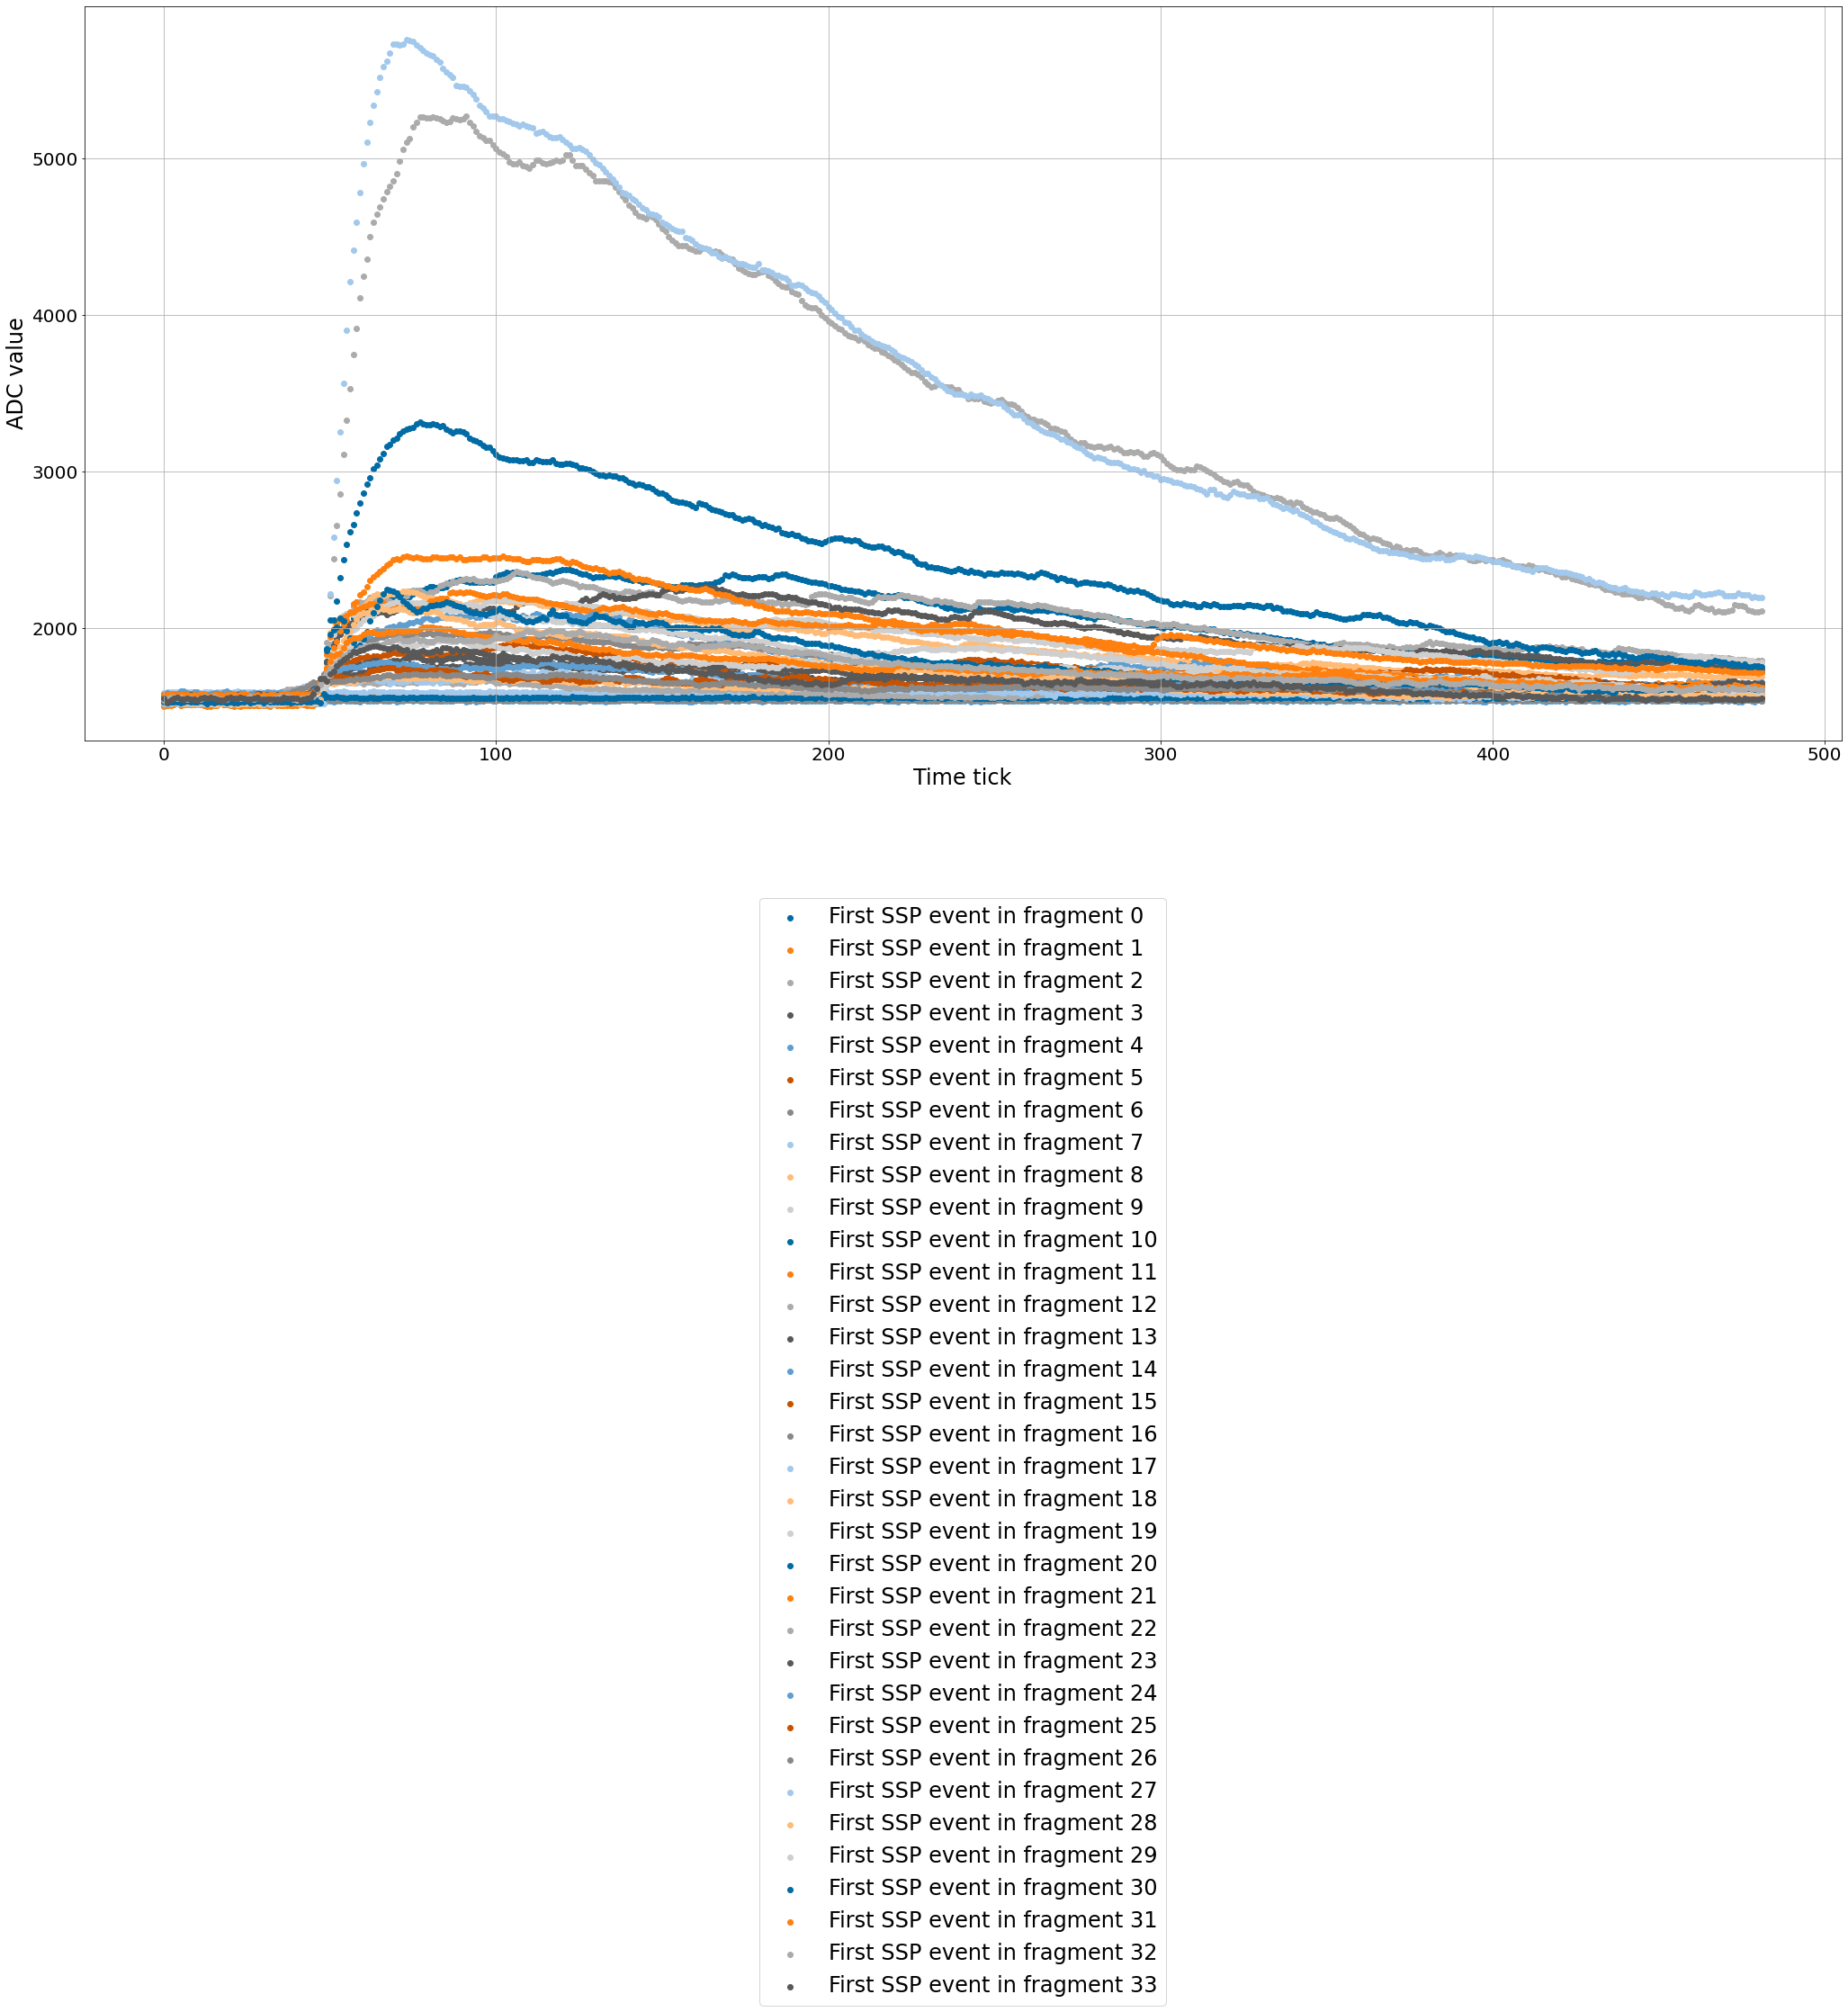

In [15]:
## =====================================================================
## Plotting histogram 
## =====================================================================


fig = plt.figure(figsize=(35,15))
ax = fig.add_subplot()

n_bins = 482
for x in range(34):
    plt.scatter(channel_id, ssp_frames[x], label="First SSP event in fragment "+ str(x))
#plt.hist(ssp_frames[1], n_bins, label="Second frame")
#plt.hist(ssp_frames[2], n_bins, label="Third frame")


ax.set_xlabel('Channel ID')
ax.set_ylabel('ADC')

plt.ylabel("ADC value")
plt.xlabel('Time tick')
#plt.yscale('log') 
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20)) #on the bottom
